In [5]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
# A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files. 
# It is the entry point to programming Spark with the DataFrame API. 
# We can create a SparkSession, usfollowing builder pattern:
spark = SparkSession.builder.getOrCreate()

from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)

# We can let Spark infer the schema of our csv data but proving pre-defined schema makes the reading process faster. 
#Further,it helps us to make the colum names to have the format we want, for example, to avoid spaces in the names of the columns.
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])


In [8]:
#create crimes dataframe by providing the schema above.
crimes = spark.read.csv("C:/lab/crimes10K.csv",
                       header = True, 
                        schema = crimes_schema)
#First, let'se see how many rows the crimes dataframe has:
print(" The crimes dataframe has {} records".format(crimes.count()))

 The crimes dataframe has 10000 records


In [9]:
#We can also see the columns, the data type of each column and the schema using the commands below.
crimes.dtypes

[('ID', 'string'),
 ('CaseNumber', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('PrimaryType', 'string'),
 ('Description', 'string'),
 ('LocationDescription', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('CommunityArea', 'string'),
 ('FBICode', 'string'),
 ('XCoordinate', 'double'),
 ('YCoordinate', 'double'),
 ('Year', 'int'),
 ('UpdatedOn', 'date'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

In [10]:
crimes.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
#We can also quickly see some rows as below. 
#We select one or more columns using select. show helps us to print the first n rows.
crimes.select("Date").show(10, truncate = False)

+----------------------+
|Date                  |
+----------------------+
|12/01/2015 11:54:00 PM|
|06/09/2016 09:00:00 AM|
|07/04/2008 05:00:00 PM|
|08/24/2002 12:11:31 AM|
|04/16/2014 06:40:00 PM|
|03/20/2017 08:00:00 PM|
|07/25/2008 02:30:00 AM|
|09/04/2007 02:31:38 PM|
|11/10/2006 01:35:00 AM|
|01/01/2008 11:00:00 PM|
+----------------------+
only showing top 10 rows



In [12]:

#Change data type of a column

#The Date column is in string format. Let's change it to timestamp format using the user defined functions (udf).

#withColumn helps to create a new column and we remove one or more columns with drop.

#Change data type of a column

#The Date column is in string format. Let's change it to timestamp format using the user defined functions (udf).

#withColumn helps to create a new column and we remove one or more columns with drop.
from datetime import datetime
from pyspark.sql.functions import col,udf

myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = crimes.withColumn('Date_time', myfunc(col('Date'))).drop("Date")

df.select(df["Date_time"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2015-12-01 23:54:00|
|2016-06-09 09:00:00|
|2008-07-04 17:00:00|
|2002-08-24 00:11:31|
|2014-04-16 18:40:00|
+-------------------+
only showing top 5 rows



In [13]:

#Calculate statistics of numeric and string columns

#We can calculate the statistics of string and numeric columns using describe.
#When we select more than one columns, we have to pass the column names as a python list.
crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe().show()

+-------+-------------------+--------------------+----------------+------------------+------------------+
|summary|           Latitude|           Longitude|            Year|       XCoordinate|       YCoordinate|
+-------+-------------------+--------------------+----------------+------------------+------------------+
|  count|               9909|                9909|           10000|              9909|              9909|
|   mean|  41.84174651101709|  -87.67146479549196|       2008.3643|1164611.4985366839|1885623.2511857906|
| stddev|0.08601164908876806|0.059134091385623054|5.01387070036114|16247.022894422713|31274.281167844252|
|    min|       41.644607723|       -87.925672502|            2001|         1095046.0|         1813910.0|
|    max|       42.022535238|       -87.524529378|            2018|         1205116.0|         1951493.0|
+-------+-------------------+--------------------+----------------+------------------+------------------+



In [14]:
#The above numbers are ugly. Let's round them using format_number from PySpark's the functions.
from pyspark.sql.functions import format_number
result = crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe()
result.select(result['summary'],
              format_number(result['Latitude'].cast('float'),2).alias('Latitude'),
              format_number(result['Longitude'].cast('float'),2).alias('Longitude'),
              result['Year'].cast('int').alias('year'),
              format_number(result['XCoordinate'].cast('float'),2).alias('XCoordinate'),
              format_number(result['YCoordinate'].cast('float'),2).alias('YCoordinate')
             ).show()

+-------+--------+---------+-----+------------+------------+
|summary|Latitude|Longitude| year| XCoordinate| YCoordinate|
+-------+--------+---------+-----+------------+------------+
|  count|9,909.00| 9,909.00|10000|    9,909.00|    9,909.00|
|   mean|   41.84|   -87.67| 2008|1,164,611.50|1,885,623.25|
| stddev|    0.09|     0.06|    5|   16,247.02|   31,274.28|
|    min|   41.64|   -87.93| 2001|1,095,046.00|1,813,910.00|
|    max|   42.02|   -87.52| 2018|1,205,116.00|1,951,493.00|
+-------+--------+---------+-----+------------+------------+



In [15]:

#How many primary crime types are there?

#distinct returns distinct elements.
crimes.select("PrimaryType").distinct().count()


27

In [17]:
#We can also see a list of the primary crime types.
crimes.select("PrimaryType").distinct().show(n = 35)

+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|               ARSON|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|INTERFERENCE WITH...|
+--------------------+



In [18]:
"""How many homicides are there in the dataset"""
crimes.where(crimes["PrimaryType"] == "HOMICIDE").count()

19

In [19]:

#how many domestic assualts there are?

#Make sure to add in the parenthesis separating the statements!
crimes.filter((crimes["PrimaryType"] == "ASSAULT") & (crimes["Domestic"] == "True")).count()

120

In [20]:
#We can use filter or where to do filtering.
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic']

crimes.where((crimes["PrimaryType"] == "HOMICIDE") & (crimes["Arrest"] == "true"))\
                                                        .select(columns).show(10)

+-----------+-------------------+------+--------+
|PrimaryType|        Description|Arrest|Domestic|
+-----------+-------------------+------+--------+
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
+-----------+-------------------+------+--------+



In [21]:
#We can use limit to limit the number of columns we want to retrieve from a dataframe.
crimes.select(columns).limit(10). show(truncate = True)

+-----------------+--------------------+------+--------+
|      PrimaryType|         Description|Arrest|Domestic|
+-----------------+--------------------+------+--------+
|          ASSAULT|              SIMPLE|  true|   false|
|            THEFT|           OVER $500| false|   false|
|WEAPONS VIOLATION|UNLAWFUL POSS OF ...|  true|   false|
|         BURGLARY|      UNLAWFUL ENTRY| false|   false|
|          BATTERY|DOMESTIC BATTERY ...| false|    true|
|         BURGLARY|      FORCIBLE ENTRY| false|   false|
|  CRIMINAL DAMAGE|         TO PROPERTY| false|   false|
|            THEFT|      $500 AND UNDER| false|   false|
|            THEFT|       FROM BUILDING| false|   false|
|          BATTERY|DOMESTIC BATTERY ...| false|    true|
+-----------------+--------------------+------+--------+



In [23]:
#Create a new column with withColumn
lat_max = crimes.agg({"Latitude" : "max"}).collect()[0][0]

print("The maximum latitude values is {}".format(lat_max))

The maximum latitude values is 42.022535238


In [33]:
#Let's subtract each latitude value from the maximum latitude.
df = crimes.withColumn("difference_from_max_lat",lat_max - crimes["Latitude"])
df.select(["Latitude", "difference_from_max_lat"]).show(5)


+------------+-----------------------+
|    Latitude|difference_from_max_lat|
+------------+-----------------------+
|41.776939754|    0.24559548400000608|
|41.883491313|    0.13904392500000284|
|41.780171969|    0.24236326900000194|
|41.934307858|     0.0882273800000064|
|41.802499513|    0.22003572500000246|
+------------+-----------------------+
only showing top 5 rows



In [37]:

#Rename a column with withColumnRenamed

#Let's rename Latitude to Lat.
df = crimes.withColumnRenamed("Beat", "Beat2")
df.columns


['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat2',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [39]:
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic','Latitude']

df.orderBy(df["Latitude"].desc()).select(columns).show(10)

+---------------+--------------------+------+--------+------------+
|    PrimaryType|         Description|Arrest|Domestic|    Latitude|
+---------------+--------------------+------+--------+------------+
|       BURGLARY|      FORCIBLE ENTRY| false|   false|42.022535238|
|       BURGLARY|      UNLAWFUL ENTRY| false|   false|42.022491744|
|      NARCOTICS|         POSS: CRACK|  true|   false|42.022078429|
|CRIMINAL DAMAGE|         TO PROPERTY| false|   false|42.022062685|
|      NARCOTICS|POSS: CANNABIS 30...|  true|   false|42.021784992|
|        BATTERY|DOMESTIC BATTERY ...| false|    true|42.021777267|
|CRIMINAL DAMAGE|         TO PROPERTY| false|   false|42.021723171|
|          THEFT|      $500 AND UNDER| false|   false|42.021422878|
|CRIMINAL DAMAGE|          TO VEHICLE| false|   false|42.021397974|
|        BATTERY|PRO EMP HANDS NO/...|  true|   false| 42.02136787|
+---------------+--------------------+------+--------+------------+
only showing top 10 rows



In [41]:

#Use PySpark's functions to calculate various statistics

#Calculate average latitude value.
from pyspark.sql.functions import mean
df.select(mean("Latitude")).alias("Mean Latitude").show()

+-----------------+
|    avg(Latitude)|
+-----------------+
|41.84174651101709|
+-----------------+



In [43]:
#We can also use the agg method to calculate the average.
df.agg({"Latitude":"avg"}).show()

+-----------------+
|    avg(Latitude)|
+-----------------+
|41.84174651101709|
+-----------------+



In [45]:
#we can also calculate maximum and minimum values using functions from Pyspark.
from pyspark.sql.functions import max,min
df.select(max("Xcoordinate"),min("Xcoordinate")).show()

+----------------+----------------+
|max(Xcoordinate)|min(Xcoordinate)|
+----------------+----------------+
|       1205116.0|       1095046.0|
+----------------+----------------+



In [47]:
#What percentage of the crimes are domestic
df.filter(df["Domestic"]==True).count()/df.count() * 100

13.56

In [50]:
#What is the Pearson correlation between Lat and Ycoordinate?
from pyspark.sql.functions import corr
df.select(corr("Latitude","Ycoordinate")).show()

+---------------------------+
|corr(Latitude, Ycoordinate)|
+---------------------------+
|         0.9999946674092067|
+---------------------------+



In [51]:
#Find the number of crimes per year
df.groupBy("Year").count().show()

+----+-----+
|Year|count|
+----+-----+
|2003|  708|
|2007|  669|
|2018|  362|
|2015|  386|
|2006|  711|
|2013|  425|
|2014|  413|
|2004|  638|
|2012|  495|
|2009|  636|
|2016|  391|
|2001|  684|
|2005|  660|
|2010|  529|
|2011|  529|
|2008|  599|
|2017|  418|
|2002|  747|
+----+-----+



In [52]:
df.groupBy("Year").count().collect()

[Row(Year=2003, count=708),
 Row(Year=2007, count=669),
 Row(Year=2018, count=362),
 Row(Year=2015, count=386),
 Row(Year=2006, count=711),
 Row(Year=2013, count=425),
 Row(Year=2014, count=413),
 Row(Year=2004, count=638),
 Row(Year=2012, count=495),
 Row(Year=2009, count=636),
 Row(Year=2016, count=391),
 Row(Year=2001, count=684),
 Row(Year=2005, count=660),
 Row(Year=2010, count=529),
 Row(Year=2011, count=529),
 Row(Year=2008, count=599),
 Row(Year=2017, count=418),
 Row(Year=2002, count=747)]

In [56]:
#We can also use matplotlib and Pandas to visualize the total number of crimes per year
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

,count,year
0,708,2003
1,669,2007
2,362,2018
3,386,2015
4,711,2006


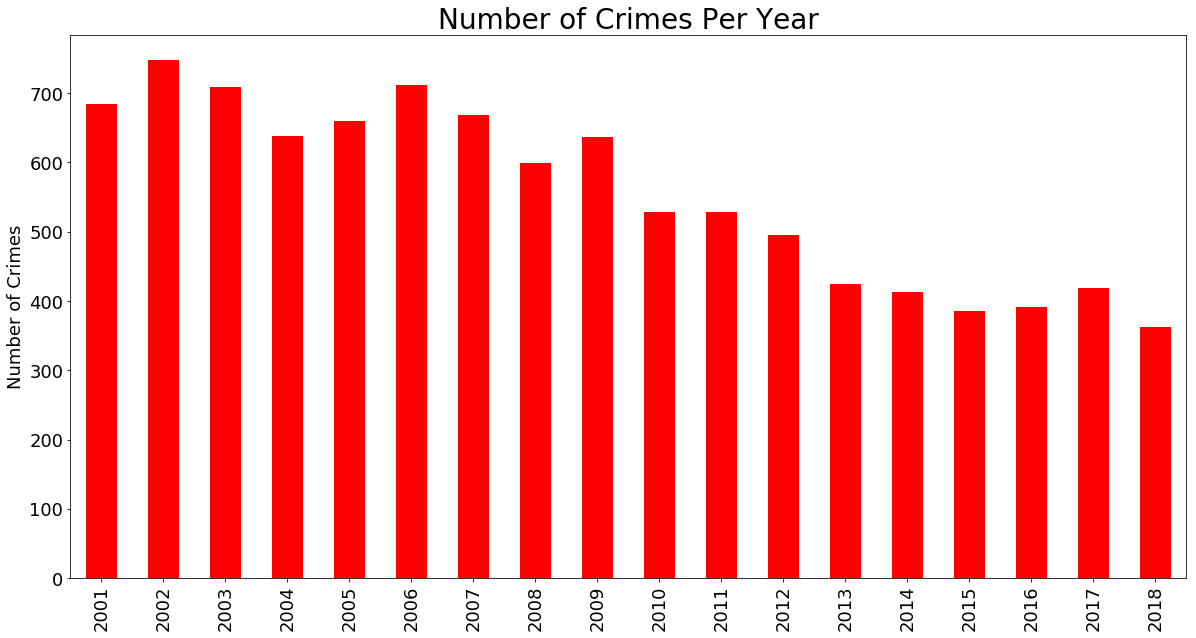

In [57]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")

number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "red",
                               x = "year", y = "count", legend = False)

plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [60]:

#Plot number of crimes by month

#we can use the month function from PySpark's functions to get the numeric month.
from datetime import datetime
from pyspark.sql.functions import col,udf

myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = crimes.withColumn('Date_time', myfunc(col('Date'))).drop("Date")

df.select(df["Date_time"]).show(5)
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month("Date_time"))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts.show()

+-------------------+
|          Date_time|
+-------------------+
|2015-12-01 23:54:00|
|2016-06-09 09:00:00|
|2008-07-04 17:00:00|
|2002-08-24 00:11:31|
|2014-04-16 18:40:00|
+-------------------+
only showing top 5 rows

+-----+-----+
|Month|count|
+-----+-----+
|   12|  720|
|    1|  739|
|    6|  929|
|    3|  834|
|    5|  867|
|    9|  828|
|    4|  846|
|    8|  907|
|    7|  969|
|   10|  892|
|   11|  813|
|    2|  656|
+-----+-----+



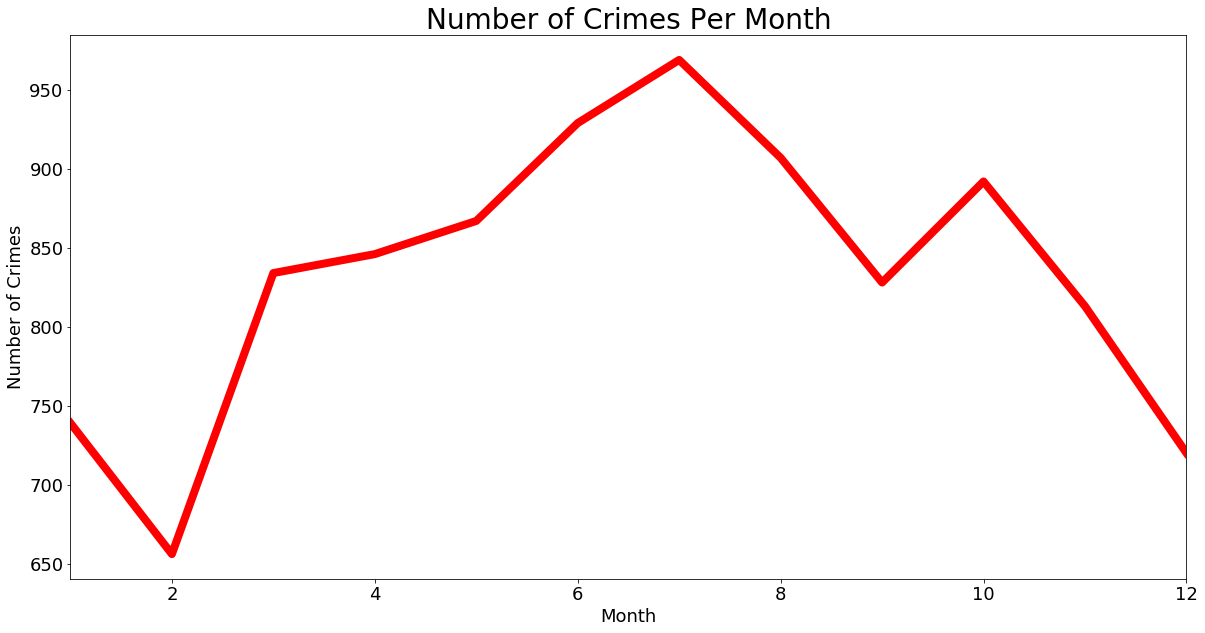

In [61]:
monthCounts = monthCounts.collect()

months = [item[0] for item in monthCounts]

count = [item[1] for item in monthCounts]

crimes_per_month = {"month":months, "crime_count": count}
crimes_per_month = pd.DataFrame(crimes_per_month)


crimes_per_month = crimes_per_month.sort_values(by = "month")

crimes_per_month.plot(figsize = (20,10), kind = "line", x = "month", y = "crime_count", 
                      color = "red", linewidth = 8, legend = False)

plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Month", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [62]:
#Where do most crimes take pace?
crimes.groupBy("LocationDescription").count().show()

+--------------------+-----+
| LocationDescription|count|
+--------------------+-----+
|AIRPORT TERMINAL ...|    1|
|POLICE FACILITY/V...|   29|
|            SIDEWALK|  983|
|CTA GARAGE / OTHE...|   11|
|            CAR WASH|    1|
|    AIRPORT/AIRCRAFT|   27|
|    FEDERAL BUILDING|    2|
|MEDICAL/DENTAL OF...|    6|
|SCHOOL, PUBLIC, G...|   42|
|         CTA STATION|    7|
|SPORTS ARENA/STADIUM|    8|
|SCHOOL, PRIVATE, ...|   23|
|  VEHICLE-COMMERCIAL|   10|
|           WAREHOUSE|   16|
|     APPLIANCE STORE|    4|
|VEHICLE - OTHER R...|    2|
|AIRPORT TERMINAL ...|    5|
|AIRPORT EXTERIOR ...|    1|
|COIN OPERATED MAC...|    2|
|        CTA PLATFORM|   63|
+--------------------+-----+
only showing top 20 rows



In [63]:
crime_location  = crimes.groupBy("LocationDescription").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location.iloc[:5]

,location,count
32,STREET,2590
51,RESIDENCE,1735
68,APARTMENT,1014
2,SIDEWALK,983
69,OTHER,353


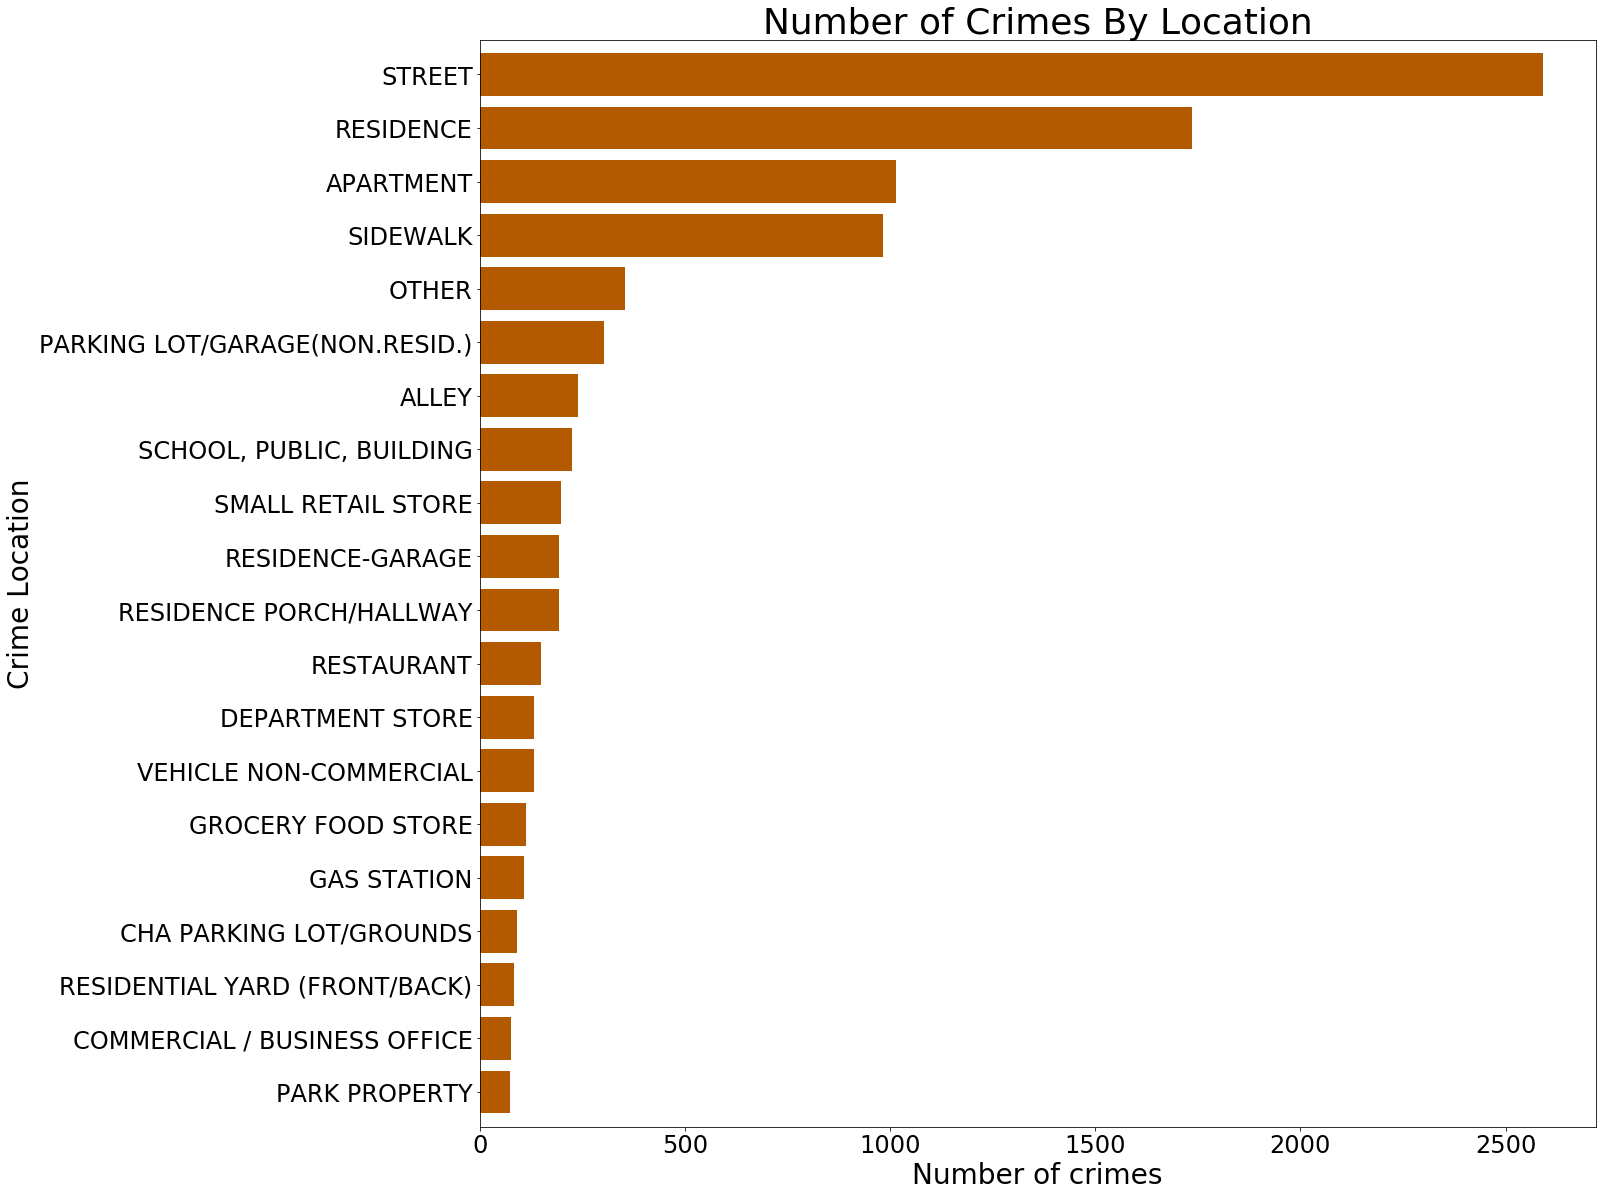

In [64]:
crime_location = crime_location.iloc[:20]

myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [65]:
#We can also calculate the number of crimes per hour, day, and month.

#Let's add day of week and hour of day columns using the date_format.

from pyspark.sql.functions import date_format
df = df.withColumn("DayOfWeek", date_format("Date_time","E")).\
      withColumn("DayOfWeek_number", date_format("Date_time","u")).\
      withColumn("HourOfDay", date_format("Date_time","H"))
weekDaysCount  = df.groupBy(["DayOfWeek", "DayOfWeek_number"]).count()
weekDaysCount.show()

+---------+----------------+-----+
|DayOfWeek|DayOfWeek_number|count|
+---------+----------------+-----+
|      Fri|               5| 1478|
|      Wed|               3| 1460|
|      Sat|               6| 1455|
|      Tue|               2| 1361|
|      Mon|               1| 1389|
|      Sun|               7| 1416|
|      Thu|               4| 1441|
+---------+----------------+-----+



In [67]:
#We can also print the schema to see the columns.
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Date_time: timestamp (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DayOfWeek_number: string (nullable = true)
 |-- HourOfDay: s

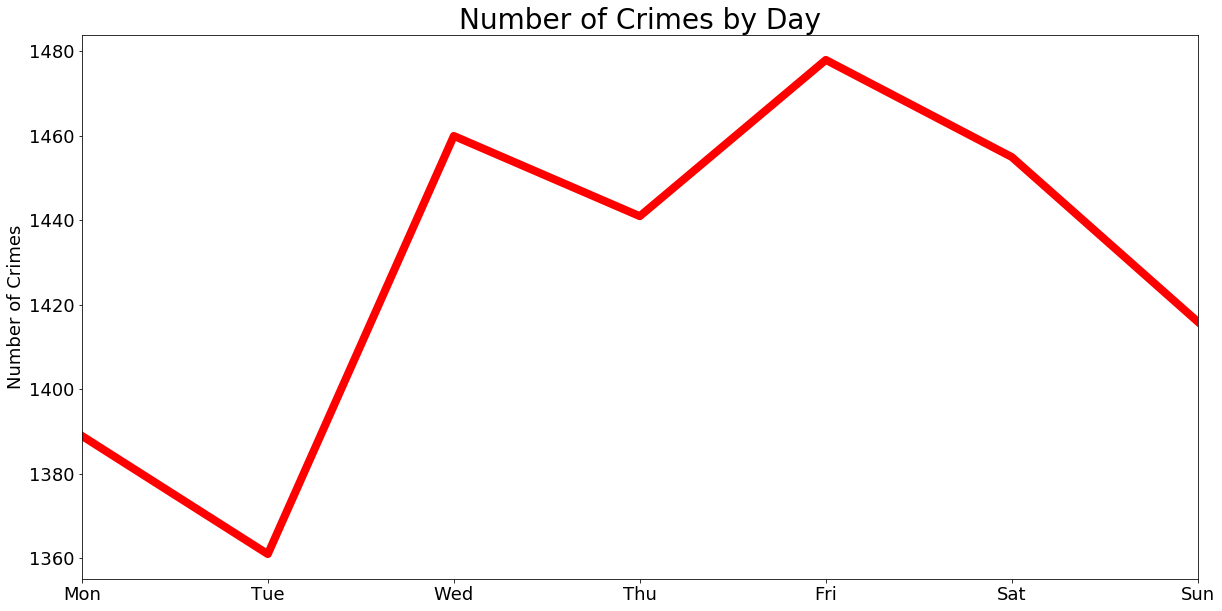

In [69]:
#Which days have the highest number of crimes?
weekDaysCount  = df.groupBy(["DayOfWeek", "DayOfWeek_number"]).count().collect()
days = [item[0] for item in weekDaysCount]
count = [item[2] for item in weekDaysCount]
day_number = [item[1] for item in weekDaysCount]
crime_byDay = {"days" : days, "count": count, "day_number": day_number}
crime_byDay = pd.DataFrame(crime_byDay)
crime_byDay = crime_byDay.sort_values(by = "day_number", ascending  = True)


crime_byDay.plot(figsize = (20,10), kind = "line", x = "days", y = "count", 
                      color = "red", linewidth = 8, legend = False)

plt.ylabel("Number of Crimes", fontsize = 18)
plt.xlabel("")
plt.title("Number of Crimes by Day", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

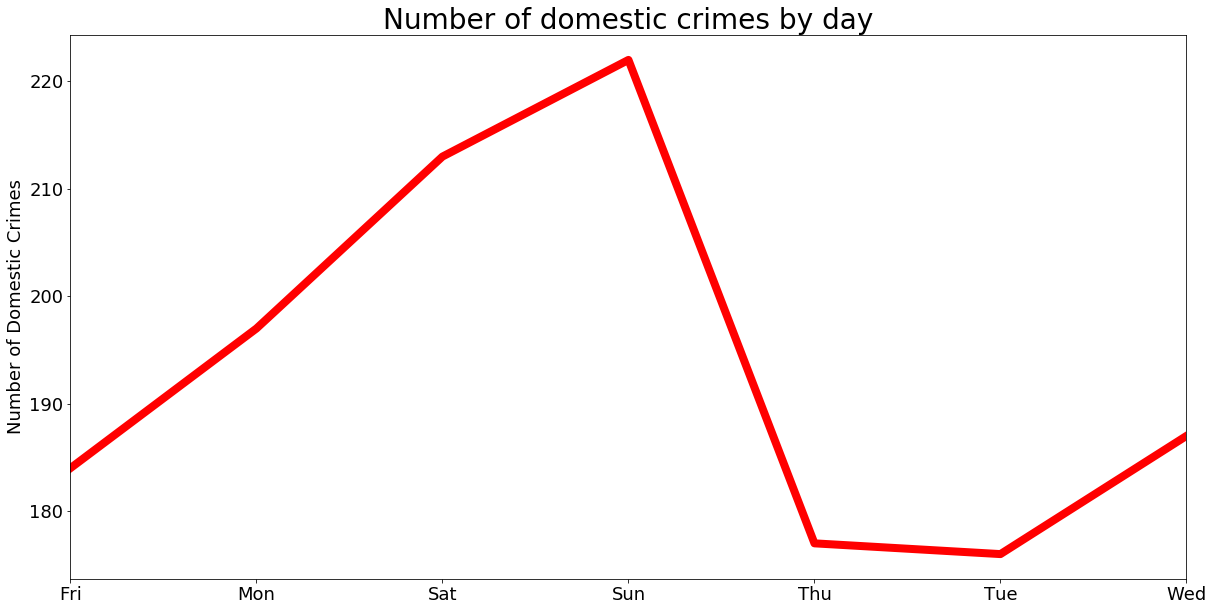

In [70]:
#we can also show only number of domestic crimes by day
weekDaysCount  = df.filter(df["Domestic"] == "true").groupBy(["DayOfWeek", "DayOfWeek_number"]).count().collect()
days = [item[0] for item in weekDaysCount]
count = [item[2] for item in weekDaysCount]
day_number = [item[1] for item in weekDaysCount]
crime_byDay = {"days" : days, "count": count, "day_number": day_number}
crime_byDay = pd.DataFrame(crime_byDay)
crime_byDay = crime_byDay.sort_values(by = "days", ascending  = True)


crime_byDay.plot(figsize = (20,10), kind = "line", x = "days", y = "count", 
                      color = "red", linewidth = 8, legend = False)

plt.ylabel("Number of Domestic Crimes", fontsize = 18)
plt.xlabel("")
plt.title("Number of domestic crimes by day", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

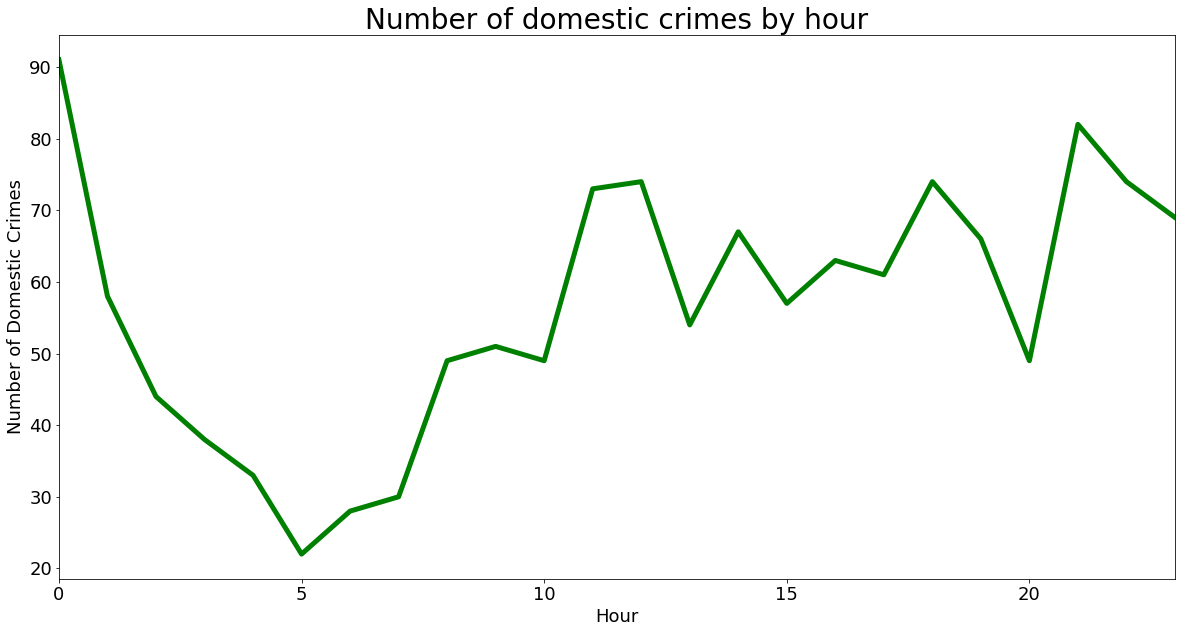

In [71]:
#Number of domestic crimes by hour
temp = df.filter(df["Domestic"] == "true")
temp = temp.select(df['HourOfDay'].cast('int').alias('HourOfDay'))
hourlyCount  = temp.groupBy(["HourOfDay"]).count().collect()

hours = [item[0] for item in hourlyCount]
count = [item[1] for item in hourlyCount]

crime_byHour = {"count": count, "hours": hours}
crime_byHour = pd.DataFrame(crime_byHour)
crime_byHour = crime_byHour.sort_values(by = "hours", ascending  = True)


crime_byHour.plot(figsize = (20,10), kind = "line", x = "hours", y = "count", 
                      color = "green", linewidth = 5, legend = False)

plt.ylabel("Number of Domestic Crimes", fontsize = 18)
plt.xlabel("Hour", fontsize = 18)
plt.title("Number of domestic crimes by hour", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [72]:
#We can also show number of domestic crimes by day and hour
import seaborn as sns
temp = df.filter(df["Domestic"] == "true")
temp = temp.select("DayOfWeek", df['HourOfDay'].cast('int').alias('HourOfDay'))
hourlyCount  = temp.groupBy(["DayOfWeek","HourOfDay"]).count().collect()

days = [item[0] for item in hourlyCount]
hours = [item[1] for item in hourlyCount]
count = [item[2] for item in hourlyCount]

crime_byHour = {"count": count, "hours": hours, "days": days}
crime_byHour = pd.DataFrame(crime_byHour)
crime_byHour = crime_byHour.sort_values(by = "hours", ascending  = True)

C:\Users\rzouga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


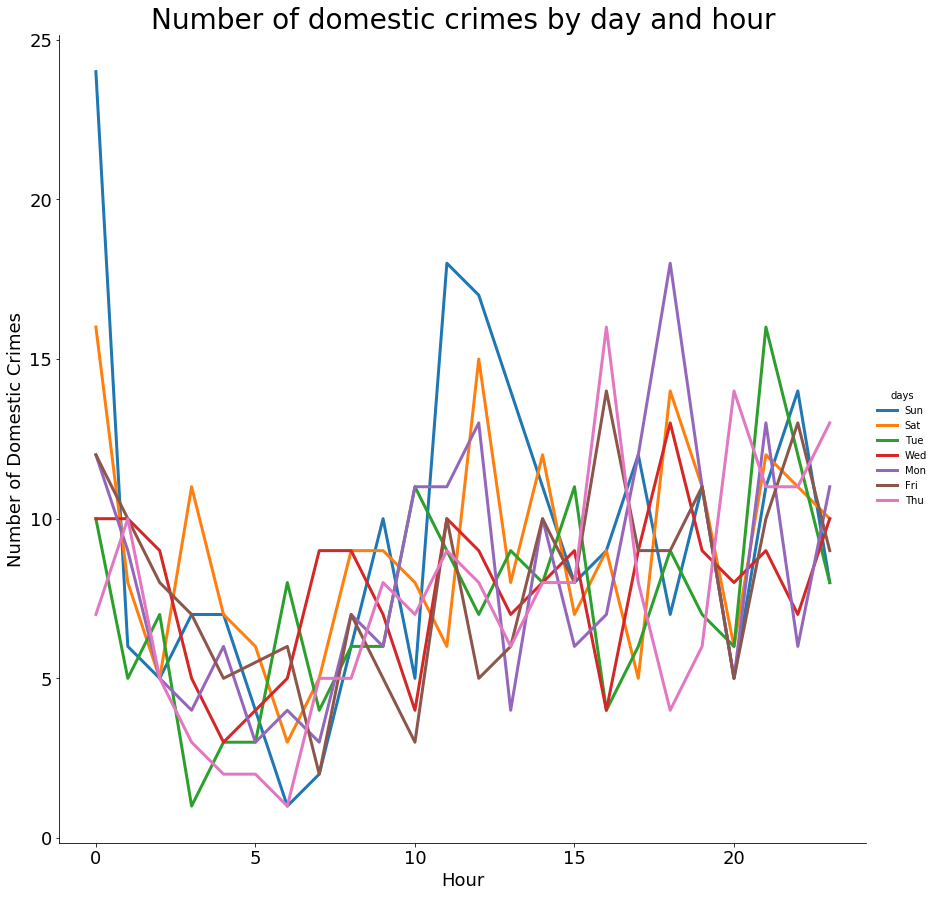

In [75]:
import seaborn as sns

g = sns.FacetGrid(crime_byHour, hue="days", size = 12)
g.map(plt.plot, "hours", "count", linewidth = 3)
g.add_legend()

plt.ylabel("Number of Domestic Crimes", fontsize = 18)
plt.xlabel("Hour", fontsize = 18)
plt.title("Number of domestic crimes by day and hour", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [ ]:

#interactif data visualisation 
%qtconsole